# Car Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Load the dataset
# Ensure 'car data.csv' is in your working directory
df = pd.read_csv('car data.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Check dataset info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
print("Fuel_Type:", df['Fuel_Type'].unique())
print("Selling_type:", df['Selling_type'].unique())
print("Transmission:", df['Transmission'].unique())
print("Owner:", df['Owner'].unique())


Unique values in categorical columns:
Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Selling_type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']
Owner: [0 1 3]


In [8]:
# Create a new feature 'Car_Age'
# We use the current year to calculate age. You can fix this to a specific year if needed.
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Drop the 'Year' column as we now have 'Car_Age'
# Drop 'Car_Name' as it has too many unique values and isn't suitable for simple prediction
df = df.drop(['Year', 'Car_Name'], axis=1)

print("Data after feature engineering:")
display(df.head())

Data after feature engineering:


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,12


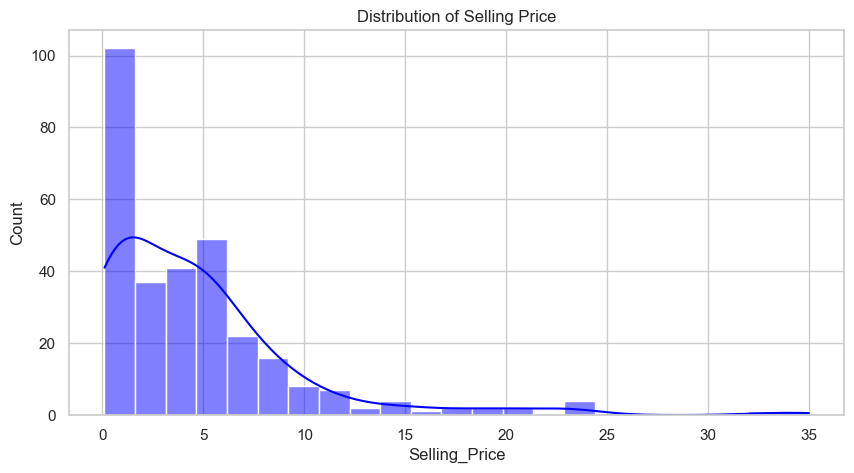

In [10]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Selling Price
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.show()

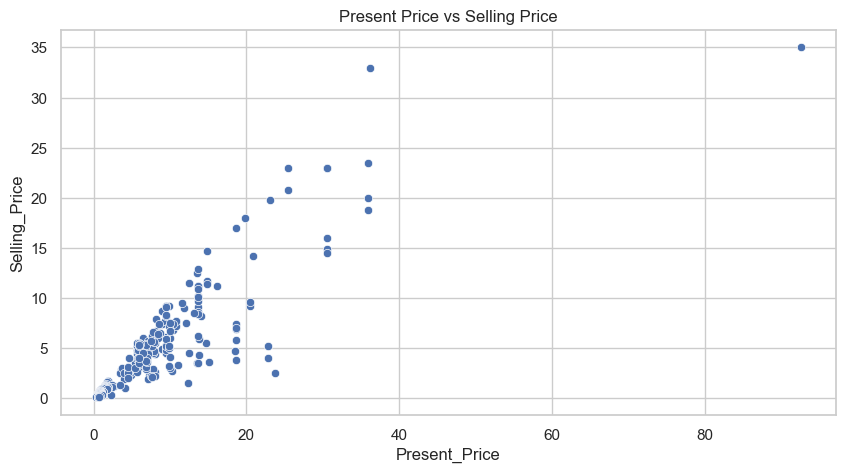

In [11]:
# 2. Relationship between Present Price and Selling Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Present Price vs Selling Price')
plt.show()

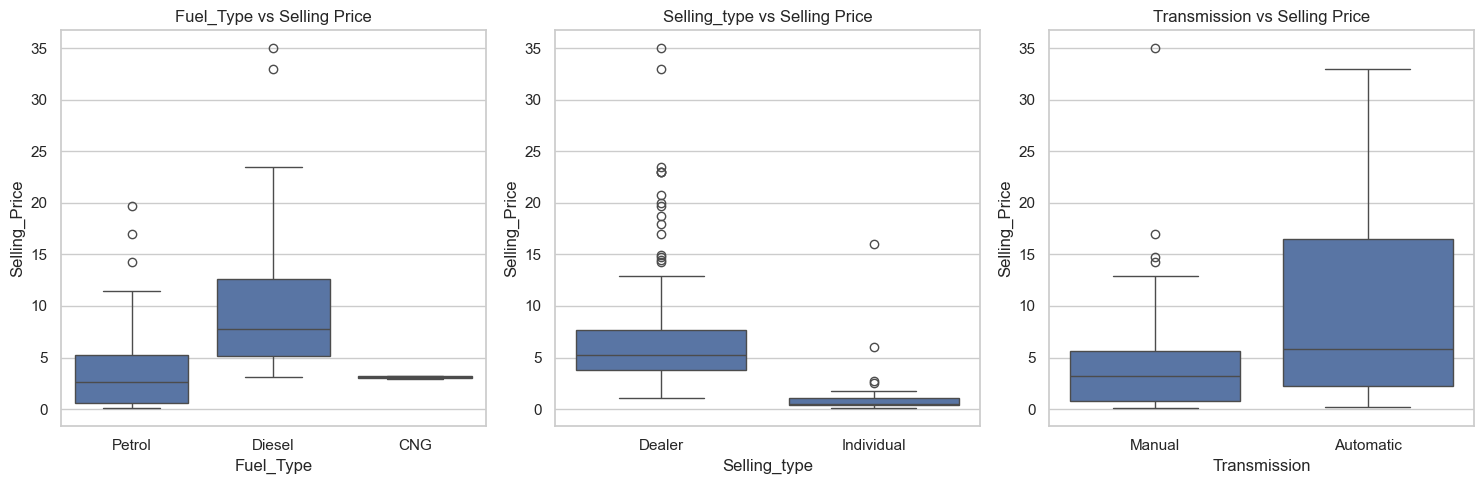

In [12]:
# 3. Boxplots for Categorical Features
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=col, y='Selling_Price', data=df)
    plt.title(f'{col} vs Selling Price')
plt.tight_layout()
plt.show()

In [14]:
# One-Hot Encoding for categorical variables
# drop_first=True helps to avoid the dummy variable trap
df_final = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Ensure all boolean columns are converted to integers (0 or 1)
bool_cols = df_final.select_dtypes(include=['bool']).columns
df_final[bool_cols] = df_final[bool_cols].astype(int)

print("Final dataset for modeling:")
display(df_final.head())

Final dataset for modeling:


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,12,0,1,0,1
1,4.75,9.54,43000,0,13,1,0,0,1
2,7.25,9.85,6900,0,9,0,1,0,1
3,2.85,4.15,5200,0,15,0,1,0,1
4,4.60,6.87,42450,0,12,1,0,0,1


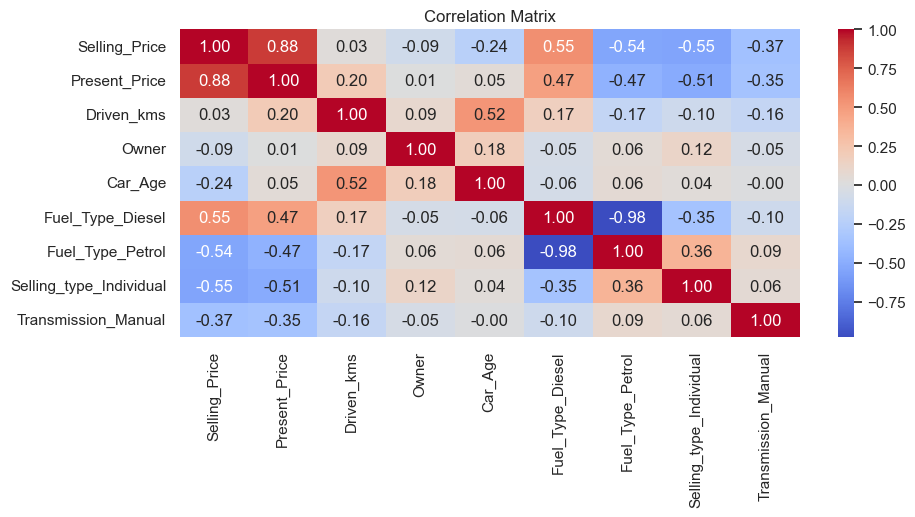

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()